<a href="https://colab.research.google.com/github/mk17250/Telecom-Customer-Data/blob/main/Predicting_Churn_with_Telecom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I will use the Telecom Customer data set to predict churn by the company's customers 

In [155]:
### Import libraries 


%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder



*   I have loaded the necessary libraries above 
*   I will now load the data into Google Colab 














In [4]:
from google.colab import files
uploaded = files.upload()

Saving telecom_users (1).xlsx to telecom_users (1).xlsx


In [74]:
df = pd.read_excel('/content/telecom_users (1).xlsx')
df.head(n=10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


### I will now extract the features from the data

In [75]:
#drop first column as have customer ID already
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [17]:
## extract features 
features = df.columns
print(features)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [18]:
## check for null values

print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [19]:
### View descriptive statistics 
print (df.describe(()))

       SeniorCitizen       tenure  MonthlyCharges
count    5986.000000  5986.000000     5986.000000
mean        0.161377    32.468760       64.802213
std         0.367909    24.516391       30.114702
min         0.000000     0.000000       18.250000
50%         0.000000    29.000000       70.400000
max         1.000000    72.000000      118.750000


## Here I visualise each individual categorical feature against churn to assess the features impact on churn

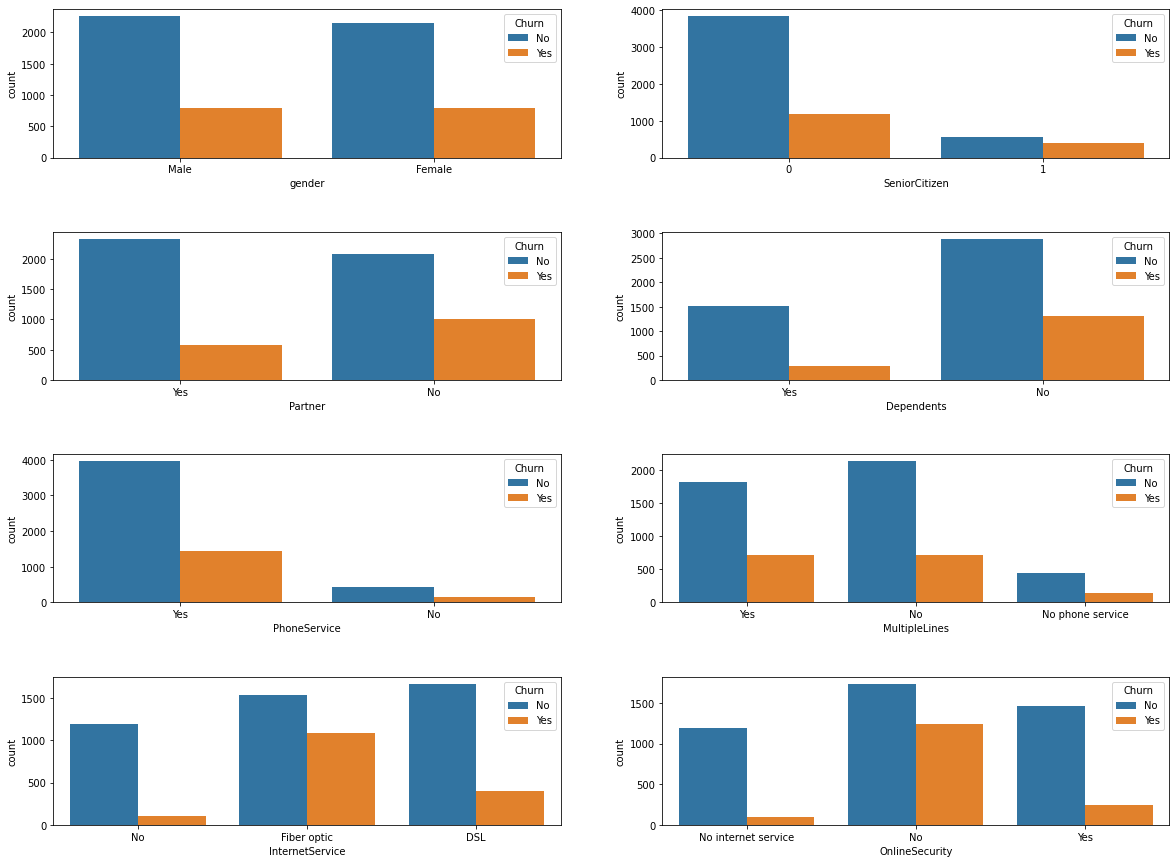

In [35]:
feature_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(feature_1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j,data = df, hue='Churn')
    plt.xticks(rotation=0)
    plt.savefig('churn1.png')

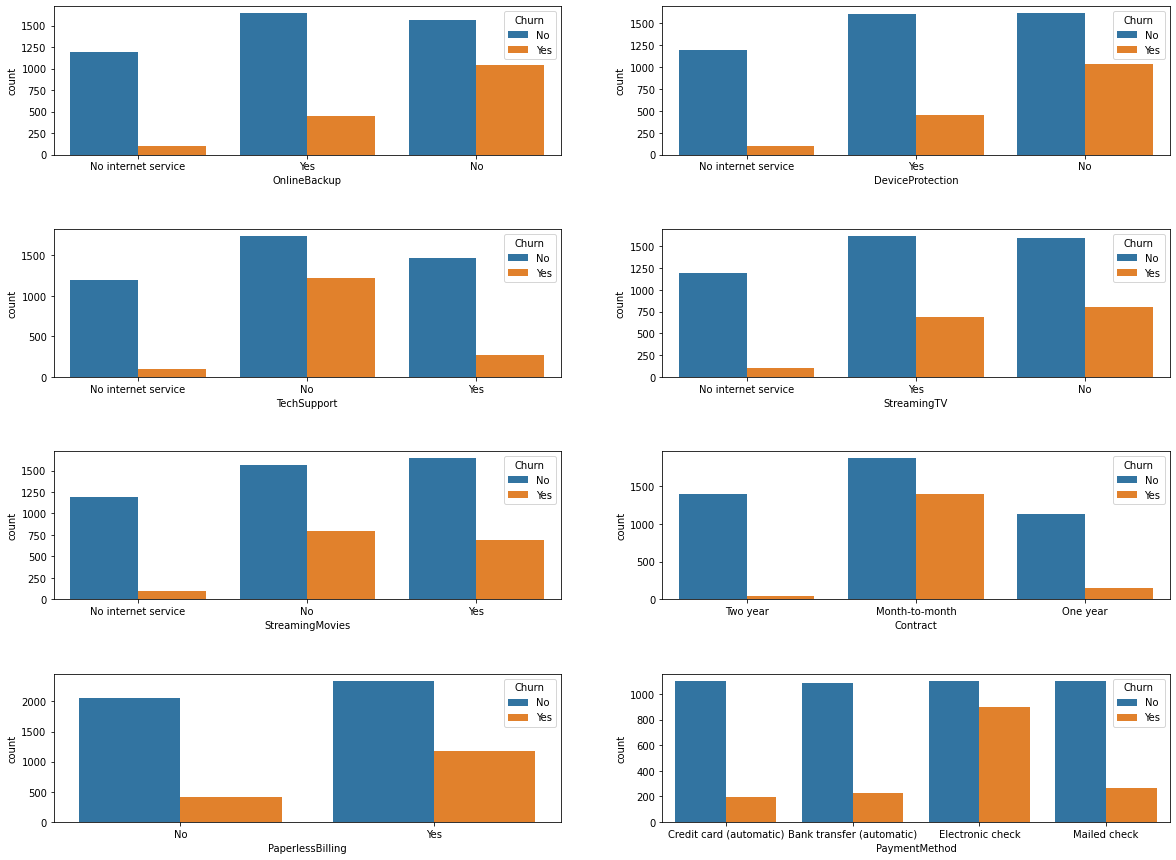

In [40]:

feature_2 = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
fig=plt.subplots(figsize=(20,15))
for a, b in enumerate(feature_2):
    plt.subplot(4, 2, a+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=b, data = df, hue='Churn')
    plt.xticks(rotation=0)
    plt.savefig('churn2.png')

Having visualized the impact of the features on churn the following observations may be made.

The following featues have litte or no significance when predicting churn:

1.   Gender 
2.   Having a partner 
3.   Having mulitple lines  

The following observations can also be made:

1.   Senior citizens are less likely to leave the company, although the impact is negligible 
2.   Customers without dependants are more likely to leave the company 
3.   Customers with a phone service are more likely to leave the company 
4.   Conversley, customers without an internet service are less likely to leave the company
5.   In contrast to this, people with the fiber optic internet service contribute heavily to churn 
6.   Customers who recieve the month-to-month contract are more likely to leave
7.   Those who pay electronically are more likely to leave the company

The previous features and their apparant realtionship with churn are therefore worth exploring to help predict the churn of customers over time.






Label encoding will now be applied to the dataframe in order to turn string varaibles into numeric varaibles. 


In [105]:
## apply label encoder to categorical variables and assign values corresponding to amount of possible outputs
df[["Churn"]] = df[["Churn"]].apply(LabelEncoder().fit_transform)
df[["gender"]] = df[["gender"]].apply(LabelEncoder().fit_transform)
df[["Partner"]] = df[["Partner"]].apply(LabelEncoder().fit_transform)
df[["Dependents"]] = df[["Dependents"]].apply(LabelEncoder().fit_transform)
df[["PhoneService"]] = df[["PhoneService"]].apply(LabelEncoder().fit_transform)
df[["MultipleLines"]] = df[["MultipleLines"]].apply(LabelEncoder().fit_transform)
df[["InternetService"]] = df[["InternetService"]].apply(LabelEncoder().fit_transform)
df[["OnlineSecurity"]] = df[["OnlineSecurity"]].apply(LabelEncoder().fit_transform)
df[["OnlineBackup"]] = df[["OnlineBackup"]].apply(LabelEncoder().fit_transform)
df[["DeviceProtection"]] = df[["DeviceProtection"]].apply(LabelEncoder().fit_transform)
df[["StreamingTV"]] = df[["StreamingTV"]].apply(LabelEncoder().fit_transform)
df[["TechSupport"]] = df[["TechSupport"]].apply(LabelEncoder().fit_transform)
df[["StreamingMovies"]] = df[["StreamingMovies"]].apply(LabelEncoder().fit_transform)
df[["Contract"]] = df[["Contract"]].apply(LabelEncoder().fit_transform)
df[["PaperlessBilling"]] = df[["PaperlessBilling"]].apply(LabelEncoder().fit_transform)
df[["StreamingTV"]] = df[["StreamingTV"]].apply(LabelEncoder().fit_transform)
df[["PaymentMethod"]] = df[["PaymentMethod"]].apply(LabelEncoder().fit_transform)
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'DeviceProetction'],
      dtype='object')


In [127]:
#checking varaibles are now numeric and have element corresponding to their information 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DeviceProetction
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0,1
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.2,0,2
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1,0
3,6994-KERXL,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.5,0,0
4,2181-UAESM,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.5,0,2


In [191]:
# the outcomes that I think are of interest are: 
x = np.array(df[['Dependents',
       'tenure', 'PhoneService', 'InternetService',
       'Contract', 'PaymentMethod']])
y = np.array(df.iloc[:,20])



In [192]:
#check x and y are as expected
print(x[0:20,:])
print(y[0:20])

[[ 1 72  1  2  2  1]
 [ 0 44  1  1  0  1]
 [ 0 38  1  1  0  0]
 [ 0  4  1  0  0  2]
 [ 0  2  1  0  0  2]
 [ 0 70  0  0  2  0]
 [ 0 33  1  1  0  2]
 [ 0  1  0  0  0  3]
 [ 0 39  0  0  1  3]
 [ 0 55  1  1  0  2]
 [ 1 52  1  0  1  2]
 [ 1 30  0  0  0  1]
 [ 0 60  1  1  0  2]
 [ 1 50  1  0  1  0]
 [ 0 32  1  1  1  0]
 [ 0 51  1  1  1  0]
 [ 0  1  1  1  0  3]
 [ 1 69  1  2  2  0]
 [ 1 42  1  1  0  2]
 [ 0 14  0  0  0  2]]
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1]


In [193]:
## split into training and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = False)

In [194]:
##Fit random forrest


from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 0)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [195]:
## predict the results

yrf_pred = rf_classifier.predict(x_test)



In [196]:
from sklearn import metrics

print('-------Random Forest Results--------')
#Checking accuracy
print("Accuracy:", metrics.accuracy_score(y_test, yrf_pred))

-------Random Forest Results--------
Accuracy: 0.7461024498886414


In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [198]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [199]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [200]:
y_pred = classifier.predict(X_test)

print(y_pred[0:30])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0]


In [201]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [202]:
print(cm)

[[900 194]
 [202 201]]


In [208]:
type(cm)

numpy.ndarray

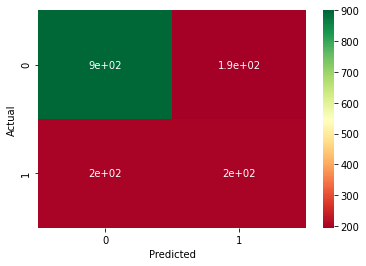

In [220]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm, cmap="RdYlGn", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()